In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from matplotlib import pyplot as plt
from IPython.display import display, Markdown
import re
sns.set()

#### Load game_details dataset

In [91]:
games_details = pd.read_csv('raw_data/games_details.csv')

/Users/biagiolicari/miniforge3/envs/workspace/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [92]:
def dataset_overview(df, df_name):
    display(Markdown(f'### {df_name} dataset overview'))
    display(Markdown(f'dataset shape : {df.shape}'))
    display(Markdown(f'#### Display 5 first rows'))
    display(df.head())
    display(Markdown('*****'))
    display(Markdown(f'#### Describe dataset'))
    display(df.describe().T)
    display(Markdown('*****'))
    display(Markdown(f'#### Missing values'))
    print_missing_values(df)

In [93]:
def print_missing_values(df):
    df_null = pd.DataFrame(len(df) - df.notnull().sum(), columns = ['Count'])
    df_null = df_null[df_null['Count'] > 0].sort_values(by='Count', ascending=False)
    df_null = df_null/len(df)*100

    if len(df_null) == 0:
        display(Markdown('No missing value.'))
        return

    x = df_null.index.values
    height = [e[0] for e in df_null.values]

    fig, ax = plt.subplots(figsize=(20, 5))
    ax.bar(x, height, width=0.8)
    plt.xticks(x, x, rotation=60)
    plt.xlabel('Columns')
    plt.ylabel('Percentage')
    plt.title('Percentage of missing values in columns')
    plt.show()

### Games Details dataset overview

dataset shape : (626111, 29)

#### Display 5 first rows

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22100213,1610612764,WAS,Washington,203484,Kentavious Caldwell-Pope,Kentavious,F,NaN,27:41,...,1.0,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0
1,22100213,1610612764,WAS,Washington,1628398,Kyle Kuzma,Kyle,F,NaN,30:28,...,1.0,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0
2,22100213,1610612764,WAS,Washington,1629655,Daniel Gafford,Daniel,C,NaN,24:21,...,2.0,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0
3,22100213,1610612764,WAS,Washington,203078,Bradley Beal,Bradley,G,NaN,35:07,...,0.0,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0
4,22100213,1610612764,WAS,Washington,203915,Spencer Dinwiddie,Spencer,G,NaN,28:34,...,0.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0


*****

#### Describe dataset

,count,mean,std,min,25%,50%,75%,max
GAME_ID,626111.0,2.164553e+07,5.656110e+06,1.030000e+07,2.060092e+07,2.120022e+07,2.170020e+07,5.200021e+07
TEAM_ID,626111.0,1.610613e+09,8.649604e+00,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
PLAYER_ID,626111.0,3.451868e+05,7.461713e+06,1.500000e+01,2.419000e+03,2.011440e+05,2.030920e+05,1.962938e+09
FGM,523751.0,3.574498e+00,3.019116e+00,0.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00,2.800000e+01
FGA,523751.0,7.878062e+00,5.657840e+00,0.000000e+00,3.000000e+00,7.000000e+00,1.100000e+01,5.000000e+01
FG_PCT,523751.0,4.158431e-01,2.516357e-01,0.000000e+00,2.500000e-01,4.290000e-01,5.710000e-01,1.000000e+00
FG3M,523751.0,7.530506e-01,1.205652e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.400000e+01
FG3A,523751.0,2.115030e+00,2.521680e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,2.400000e+01
FG3_PCT,523751.0,1.974271e-01,2.892926e-01,0.000000e+00,0.000000e+00,0.000000e+00,3.750000e-01,1.000000e+00
FTM,523751.0,1.738716e+00,2.356272e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,2.600000e+01


*****

#### Missing values

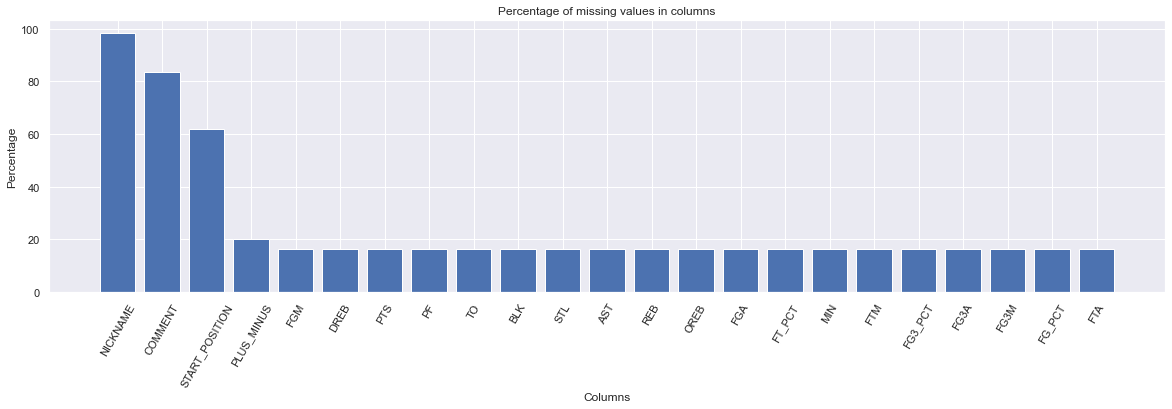

In [94]:
dataset_overview(games_details, 'Games Details')

In [95]:
print(games_details.shape)

(626111, 29)


In [96]:
# Clean player details
# right join btw games details and games on key GAMES_ID to exclude season < 2010
games = pd.read_csv('curated_data/games.csv')
games_details = games_details.merge(games[['GAME_ID', 'SEASON']], on='GAME_ID')
print(games_details.shape)

(360582, 30)


In [97]:
# Drop some not useful colums
cols_name = ['NICKNAME', 'COMMENT', 'SEASON']
games_details.drop(labels=cols_name, axis=1, inplace=True)
games_details.drop_duplicates(subset=['GAME_ID', 'TEAM_ID', 'PLAYER_ID'],inplace=True)
games_details.reset_index(inplace=True, drop=True)

In [98]:
# If the player is on the bench, column 'START POSITION' has a NaN value
games_details[games_details['START_POSITION'].isna()].shape

(218808, 27)

In [99]:
# Fill NaN value of START_POSITION with B value
games_details['START_POSITION'] = games_details['START_POSITION'].fillna('B')

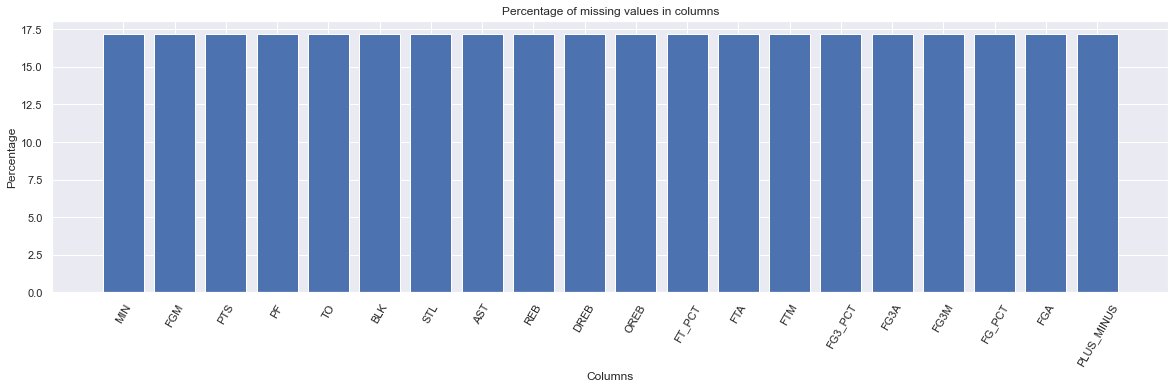

In [100]:
print_missing_values(games_details)

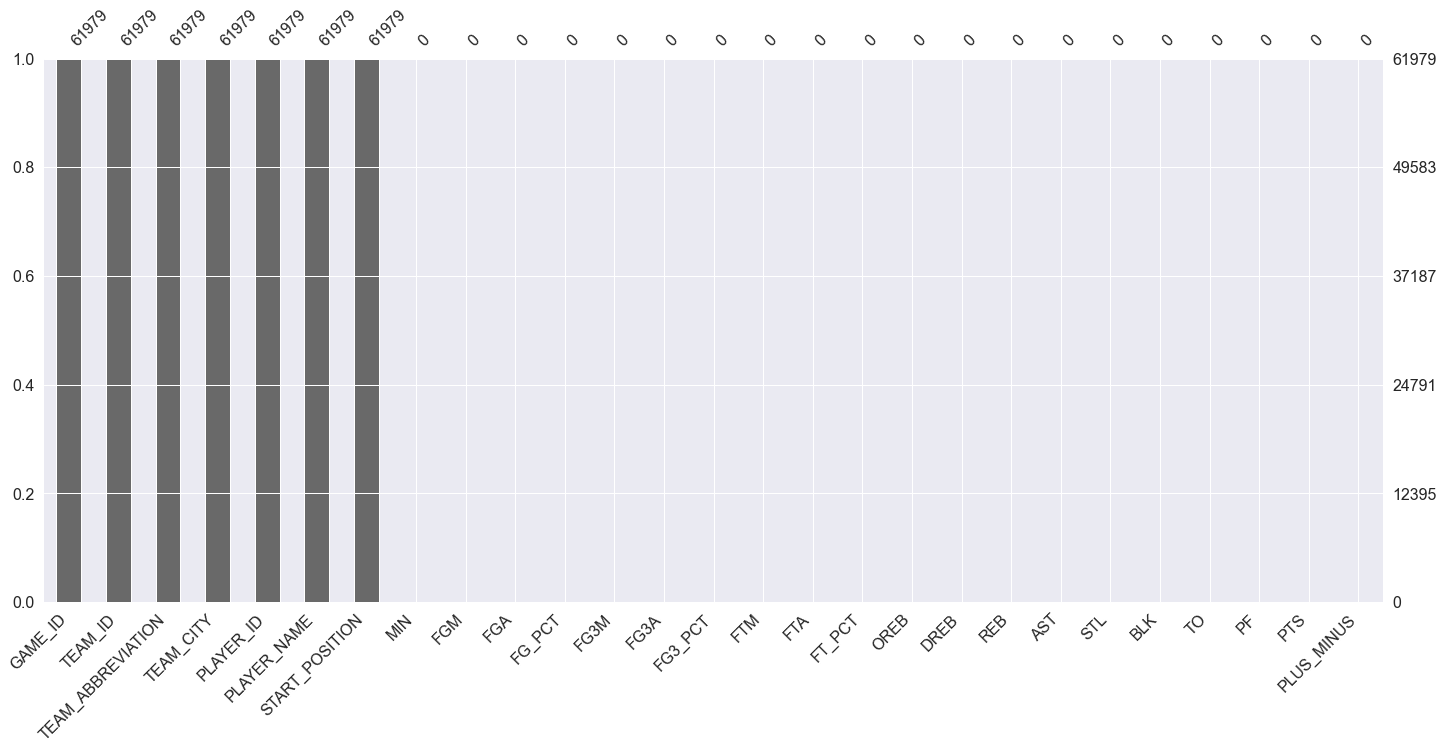

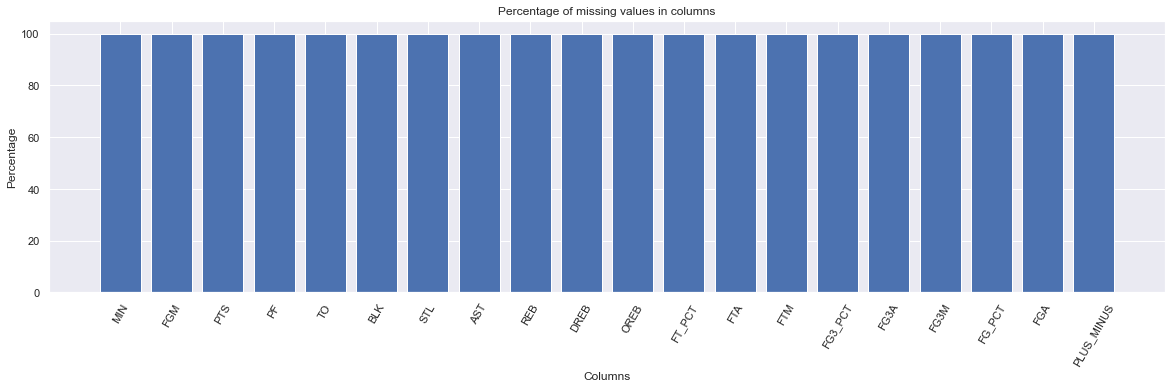

In [101]:
games_details_nan = games_details[games_details.isna().any(axis=1)]
msno.bar(games_details_nan)
print_missing_values(games_details_nan)
# As we can see, in the dataset, if a stats per player is NaN the rest of feature are also not present
# Due to this reason, the rows will be deleted because are unuseful

In [102]:
# delete rows that have a tresh > 19 of NaN values
# the tresh > 19 rapresent that if more than 19 columns have NaN, they are deleted
games_details.dropna(axis=0, thresh=19, inplace=True)
games_details.reset_index(inplace=True, drop=True)

In [103]:
# plot missing value %
print_missing_values(games_details)

#Only PLUS_MINUS has a % of 25% of NaN value

No missing value.

In [104]:
# The PLUS_MINUS value of a player reflects how the team did while that player is on the court. If the player isn't on the court
# we can set value to 0.0
games_details['PLUS_MINUS'].fillna(value=0.0, inplace=True) #replace NaN value with 0.0

In [105]:
print_missing_values(games_details)

No missing value.

In [106]:
# Function to convert str in format Minutes:Seconds to number
# Formula = x𝑚𝑖𝑛+y𝑠*1𝑚𝑖𝑛/60𝑠
def convert_datetime_to_decimal(datetime, splitter=':') :
    datetime_list = [float(i) for i in (datetime).split(splitter)]
    return (datetime_list[0] + (datetime_list[1] * 1/60)) if len(datetime_list) == 2 else datetime_list[0]

# Apply convert_datetime_to_decimal to MIN columns of dataframe
games_details['MIN'] = games_details['MIN'].apply(lambda datetime : convert_datetime_to_decimal(datetime))

In [107]:
games_details

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,MIN,FGM,FGA,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22100213,1610612764,WAS,Washington,203484,Kentavious Caldwell-Pope,F,27.683333,1.0,6.0,...,1.0,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0
1,22100213,1610612764,WAS,Washington,1628398,Kyle Kuzma,F,30.466667,2.0,12.0,...,1.0,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0
2,22100213,1610612764,WAS,Washington,1629655,Daniel Gafford,C,24.350000,9.0,12.0,...,2.0,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0
3,22100213,1610612764,WAS,Washington,203078,Bradley Beal,G,35.116667,9.0,20.0,...,0.0,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0
4,22100213,1610612764,WAS,Washington,203915,Spencer Dinwiddie,G,28.566667,0.0,5.0,...,0.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298274,21200001,1610612739,CLE,Cleveland,101139,CJ Miles,B,17.700000,1.0,5.0,...,0.0,4.0,4.0,1.0,0.0,0.0,3.0,0.0,2.0,2.0
298275,21200001,1610612739,CLE,Cleveland,203092,Tyler Zeller,B,14.883333,2.0,4.0,...,0.0,2.0,2.0,0.0,1.0,1.0,0.0,2.0,5.0,4.0
298276,21200001,1610612739,CLE,Cleveland,200789,Daniel Gibson,B,16.183333,3.0,5.0,...,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0,10.0,-9.0
298277,21200001,1610612739,CLE,Cleveland,2575,Luke Walton,B,12.233333,1.0,2.0,...,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,-11.0


In [108]:
games_details = games_details[games_details['MIN'] >= 16].copy()

### Add some new interesting features based on player stats to the dataset

In [109]:
# https://www.breakthroughbasketball.com/stats/definitions.html
# FG2M : the number of 2 point shots made
games_details['FG2M'] = round((games_details['FGM'] - games_details['FG3M']), 2)

In [110]:
#Points Per Shot Attempt (PTS/FGA) :
#Points Per Shot Attempt is a player efficiency evaluation metric which is calculated by dividing
#the total points (2P made and 3P made) by the total field goals attempts.
#Formula=(Total Points off of 2PA and 3PA)/(Total FGA)
games_details['PTS_FGA'] = round(
        (((games_details['FG2M'] * 2) + games_details['FG3M'] * 3) / games_details['FGA']),
        2 )

In [111]:
# FG2A : the number of 2 point shots attempted
games_details['FG2A'] = round((games_details['FGA'] - games_details['FG3A']), 2)

In [112]:
# EFG% – the Effective Field Goal percentage
games_details['EFG'] = round(((games_details['FGM'] + (0.5*games_details['FG3M'])) / games_details['FGA']), 2)

In [113]:
# FG_MISSED : field goal missed
games_details['FG_MISSED'] = round((games_details['FGA'] - games_details['FGM']), 2)
# FT_MISSED : field throw missed
games_details['FT_MISSED'] = round((games_details['FTA'] - games_details['FTM']), 2)

In [114]:
# EFFICACY a measure of a player's efficiency, Effic = Pts + Rebs + Ast + Stl + Blk – (TO + FG Misses + FT Misses)
games_details['EFFICACY'] = round((games_details['PTS']\
                                + games_details['REB']\
                                + games_details['AST']\
                                + games_details['STL']\
                                + games_details['BLK']\
                                - (games_details['TO'] + games_details['FG_MISSED'] + games_details['FT_MISSED'])),
                                  2)

In [115]:
# PIE : Player Efficiency Stats
# http://www.rustylarue.com/more-than-94rsquo/player-efficiency-stats
# (2FG Made*2) - (2FG Attempted*.75) + (3FG Made*3) – (3FG Attempted*.84) + (FT Made)
# - (FT Attempted*-.65) + Rebounds + Assists + Blocks + Steals - Turnovers
games_details['PIE'] = round(((games_details['FG2M']*2)
                              - (games_details['FG2A'] * .75)
                              + (games_details['FG3M'] * 3) \
                                - (games_details['FG3A'] * .84)
                                + games_details['FTM']
                                - (games_details['FTA'] * .65) \
                                + games_details['REB'] + games_details['AST']
                                + games_details['BLK'] + games_details['STL'] \
                                - games_details['TO']), 2)

In [116]:
games_details.head(15)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,MIN,FGM,FGA,...,PTS,PLUS_MINUS,FG2M,PTS_FGA,FG2A,EFG,FG_MISSED,FT_MISSED,EFFICACY,PIE
0,22100213,1610612764,WAS,Washington,203484,Kentavious Caldwell-Pope,F,27.683333,1.0,6.0,...,3.0,2.0,1.0,0.33,1.0,0.17,5.0,0.0,6.0,5.40
1,22100213,1610612764,WAS,Washington,1628398,Kyle Kuzma,F,30.466667,2.0,12.0,...,5.0,-14.0,1.0,0.42,4.0,0.21,10.0,0.0,5.0,5.28
2,22100213,1610612764,WAS,Washington,1629655,Daniel Gafford,C,24.350000,9.0,12.0,...,20.0,-2.0,9.0,1.50,12.0,0.75,3.0,3.0,26.0,19.75
3,22100213,1610612764,WAS,Washington,203078,Bradley Beal,G,35.116667,9.0,20.0,...,24.0,-9.0,4.0,1.15,9.0,0.57,11.0,0.0,23.0,17.36
4,22100213,1610612764,WAS,Washington,203915,Spencer Dinwiddie,G,28.566667,0.0,5.0,...,0.0,-5.0,0.0,0.00,1.0,0.00,5.0,0.0,-2.0,-1.11
5,22100213,1610612764,WAS,Washington,203526,Raul Neto,B,17.983333,1.0,6.0,...,2.0,-8.0,1.0,0.33,4.0,0.17,5.0,0.0,-3.0,-2.68
6,22100213,1610612764,WAS,Washington,1626149,Montrezl Harrell,B,22.200000,6.0,9.0,...,15.0,-11.0,6.0,1.33,9.0,0.67,3.0,0.0,24.0,18.30
7,22100213,1610612764,WAS,Washington,1630166,Deni Avdija,B,24.983333,2.0,9.0,...,9.0,-10.0,1.0,0.56,2.0,0.28,7.0,0.0,14.0,11.02
13,22100213,1610612766,CHA,Charlotte,202330,Gordon Hayward,F,25.250000,4.0,14.0,...,8.0,-7.0,4.0,0.57,11.0,0.29,10.0,0.0,5.0,4.23
14,22100213,1610612766,CHA,Charlotte,1628970,Miles Bridges,F,37.383333,8.0,15.0,...,17.0,15.0,7.0,1.13,11.0,0.57,7.0,1.0,21.0,16.74


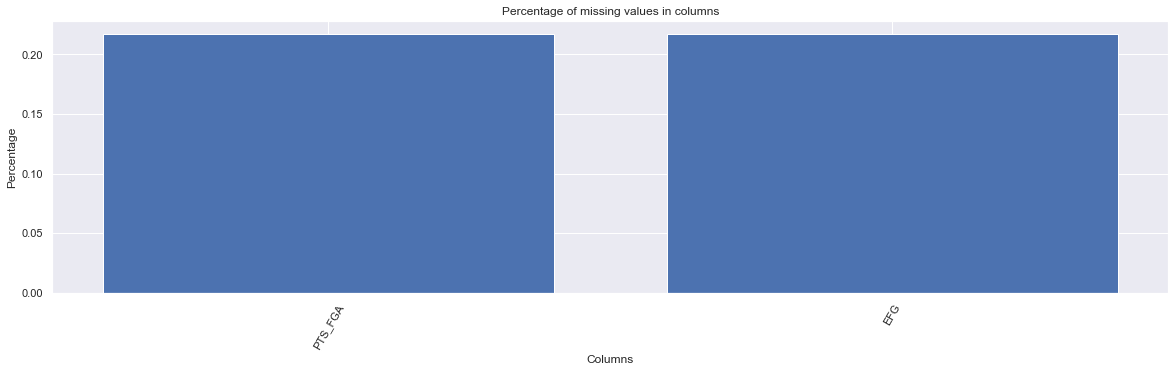

In [117]:
print_missing_values(games_details)

In [118]:
# Replace EFG NaN value with 0.0
games_details['EFG'].fillna(value=0.0, inplace=True)

#### Create a new Dataframe with the sum of stats (team stats) and the avg of single player stats

In [119]:
# check equal size
games_details['GAME_ID'].unique().size == games['GAME_ID'].unique().size

True

In [120]:
def compute_avg_of_players_stats(df):
    games_details_avg = df.mean()[['GAME_ID',
                                    'TEAM_ID',
                                    'EFFICACY',
                                    'EFG',
                                    'PTS_FGA',
                                    'PIE']]
    return games_details_avg

def compute_sum_of_games_stats(df) :
    games_details = df.sum()
    games_details.drop(['PLAYER_ID', 'FG_PCT','FG3_PCT','FT_PCT','PLUS_MINUS'], axis=1, inplace=True)
    games_details["FG_PCT"] = games_details["FGM"] / games_details["FGA"]
    games_details["FG3_PCT"] = games_details["FG3M"] / games_details["FG3A"]
    games_details["FT_PCT"] = games_details["FTM"] / games_details["FTA"]
    return games_details.drop(['EFFICACY', 'EFG', 'PTS_FGA', 'PIE'], axis=1)

def round_features_to_two_decimal(df):
    df['EFFICACY'] = round(df['EFFICACY'], 2)
    df['EFG'] = round(df['EFG'], 2)
    df['PTS_FGA'] = round(df['PTS_FGA'], 2)
    df['PIE'] = round(df['PIE'], 2)
    df['FG_PCT'] = round(df['FG_PCT'], 2)
    df['FG3_PCT'] = round(df['FG3_PCT'], 2)
    df['FT_PCT'] = round(df['FT_PCT'], 2)
    return df

def compute_group_and_merge_full_games_stats (df) :
    games_details_grouped = df.groupby(["GAME_ID","TEAM_ID", "TEAM_ABBREVIATION"], as_index=False)
    games_details_avg = compute_avg_of_players_stats(games_details_grouped)
    games_details = compute_sum_of_games_stats(games_details_grouped)
    games_details_merged = pd.merge(games_details, games_details_avg, on=['GAME_ID', 'TEAM_ID'])
    games_details_merged = round_features_to_two_decimal(games_details_merged)
    return games_details_merged


In [121]:
games_details = compute_group_and_merge_full_games_stats(games_details)

In [122]:
games_details.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,MIN,FGM,FGA,FG3M,FG3A,FTM,FTA,...,FG2A,FG_MISSED,FT_MISSED,FG_PCT,FG3_PCT,FT_PCT,EFFICACY,EFG,PTS_FGA,PIE
0,11900101,1610612746,LAC,177.383333,32.0,72.0,16.0,41.0,12.0,14.0,...,31.0,40.0,2.0,0.44,0.39,0.86,11.11,0.56,1.12,8.36
1,11900101,1610612753,ORL,148.966667,26.0,61.0,5.0,24.0,17.0,20.0,...,37.0,35.0,3.0,0.43,0.21,0.85,9.00,0.37,0.74,6.14
2,11900102,1610612743,DEN,200.000000,28.0,63.0,10.0,31.0,23.0,28.0,...,32.0,35.0,5.0,0.44,0.32,0.82,12.50,0.60,1.20,8.97
3,11900102,1610612764,WAS,171.333333,28.0,71.0,9.0,27.0,11.0,16.0,...,44.0,43.0,5.0,0.39,0.33,0.69,9.12,0.50,1.00,6.86
4,11900103,1610612740,NOP,79.083333,12.0,32.0,4.0,14.0,3.0,3.0,...,18.0,20.0,0.0,0.38,0.29,1.00,9.75,0.42,0.86,7.95


### Add some new interesting features to dataframe

#### Calculate POSS per each team of the match

In [123]:
def get_home_and_away_df(df):
    team_df_boolean = df.duplicated(subset="GAME_ID", keep='first')
    team_df = df[team_df_boolean]
    opp_df_boolean = df.duplicated(subset="GAME_ID", keep='last')
    opp_df = df[opp_df_boolean]
    team_df.reset_index(inplace=True, drop=True)
    opp_df.reset_index(inplace=True, drop=True)
    return team_df, opp_df

df_team, df_opp = get_home_and_away_df(games_details)

In [124]:
#POSS
#More Specific Possession Formula=
# 0.5*((Field Goal Attempts + 0.4*Free Throw Attempts
# – 1.07*(Offensive Rebounds/(Offensive Rebounds + Opponent Defensive Rebounds))*(Field Goal Attempts – FG)
# + Turnovers) + (Opponent Field Goal Attempts + 0.4*(Opponent Free Throw Attempts)
# – 1.07*(Opponent Offensive Rebounds)/(Opponent Offensive Rebounds + Defensive Rebounds))
# *(Opponent Field Goal Attempts – Opponent FG) + Opponent Turnovers))

def compute_poss(team_a, team_b):
    team_df = team_a.copy()
    opp_df = team_b.copy()
    team_df['POSS'] =round((0.5 * ((team_df['FGA'] + 0.4 * team_df['FTA']
                - 1.07 * (team_df['OREB'] / (team_df['OREB'] + opp_df['DREB']))
                *(team_df['FGA'] - team_df['FGM']) + team_df['TO'])
                + (opp_df['FGA'] + 0.4 * (opp_df['FTA'])
                - 1.07 * (opp_df['OREB'] / (opp_df['OREB'] + team_df['DREB']))
                * (opp_df['FGA'] - team_df['FGM']) + opp_df['TO']))), 2)
    return team_df

def compute_poss_per_match(team_a, team_b):
    team_df = team_a.copy()
    opp_df = team_b.copy()
    team_df = compute_poss(team_df, opp_df)
    opp_df = compute_poss(opp_df, team_df)
    team_df.reset_index(inplace=True, drop=True)
    opp_df.reset_index(inplace=True, drop=True)
    return team_df[['GAME_ID', 'TEAM_ID', 'POSS', 'PTS', 'MIN']],opp_df[['GAME_ID', 'TEAM_ID', 'POSS', 'PTS', 'MIN']]

In [125]:
first_team_df, second_team_df = compute_poss_per_match(df_team, df_opp)

#### Calculate PACE for each team per match

In [126]:
#Pace is the total number of possessions a team uses in a game.
#Pace Calculation Formula=[240/(Team Minutes)]*(Possessionteam+Possessionopponent)/2
def compute_pace(team_a, team_b):
    team_df = team_a.copy()
    opp_df = team_b.copy()
    team_df['PACE'] = round((240 / team_df['MIN'] * (team_df['POSS'] + opp_df['POSS']) / 2), 2)
    return team_df

def compute_pace_per_match(team_a, team_b):
    team_df = team_a.copy()
    opp_df = team_b.copy()
    team_df = compute_pace(team_df, opp_df)
    opp_df = compute_pace(opp_df, team_df)
    team_df.reset_index(inplace=True, drop=True)
    opp_df.reset_index(inplace=True, drop=True)
    return team_df,opp_df

In [127]:
first_team_df, second_team_df = compute_pace_per_match(first_team_df, second_team_df)

#### Calculate OfFensive efficiency and Defensive Efficiency of teams per match

In [128]:
#Offensive efficiency
#Offensive efficiency is the number of points a team scores per 100 possessions.
#Offensive Efficiency Formula= 100*(Points Scored / Possessions)
#“offensive efficiency” of a team is equal to defensive efficiency of the opponent team.
def compute_off_effiency_and_def_efficiency(team_a, team_b):
    team_df = team_a.copy()
    opp_df = team_b.copy()
    off_efc_def_efc = round((100 * (team_df['PTS'] / team_df['POSS'])))
    team_df['OFF_EFC'] = off_efc_def_efc
    opp_df['DEF_EFC'] = off_efc_def_efc
    return team_df, opp_df

In [129]:
first_team_df, second_team_df = compute_off_effiency_and_def_efficiency(first_team_df, second_team_df)
second_team_df, first_team_df = compute_off_effiency_and_def_efficiency(second_team_df, first_team_df)

In [130]:
# Merge all df together
tmp_df = pd.concat([first_team_df, second_team_df], axis=0)
tmp_df.drop(['MIN', 'PTS'], inplace=True, axis=1)

In [131]:
games_details = pd.merge(games_details, tmp_df, on=['GAME_ID', 'TEAM_ID'])
games_details.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,MIN,FGM,FGA,FG3M,FG3A,FTM,FTA,...,FG3_PCT,FT_PCT,EFFICACY,EFG,PTS_FGA,PIE,POSS,PACE,OFF_EFC,DEF_EFC
0,11900101,1610612746,LAC,177.383333,32.0,72.0,16.0,41.0,12.0,14.0,...,0.39,0.86,11.11,0.56,1.12,8.36,76.13,102.27,121.0,99.0
1,11900101,1610612753,ORL,148.966667,26.0,61.0,5.0,24.0,17.0,20.0,...,0.21,0.85,9.00,0.37,0.74,6.14,75.05,121.78,99.0,121.0
2,11900102,1610612743,DEN,200.000000,28.0,63.0,10.0,31.0,23.0,28.0,...,0.32,0.82,12.50,0.60,1.20,8.97,82.59,99.11,108.0,92.0
3,11900102,1610612764,WAS,171.333333,28.0,71.0,9.0,27.0,11.0,16.0,...,0.33,0.69,9.12,0.50,1.00,6.86,82.59,115.69,92.0,108.0
4,11900103,1610612740,NOP,79.083333,12.0,32.0,4.0,14.0,3.0,3.0,...,0.29,1.00,9.75,0.42,0.86,7.95,55.11,171.18,56.0,113.0


In [132]:
#Save this new dataframe
games_details.to_csv('curated_data/game_details.csv', index=False)

#### Let's do some plot

<AxesSubplot:>

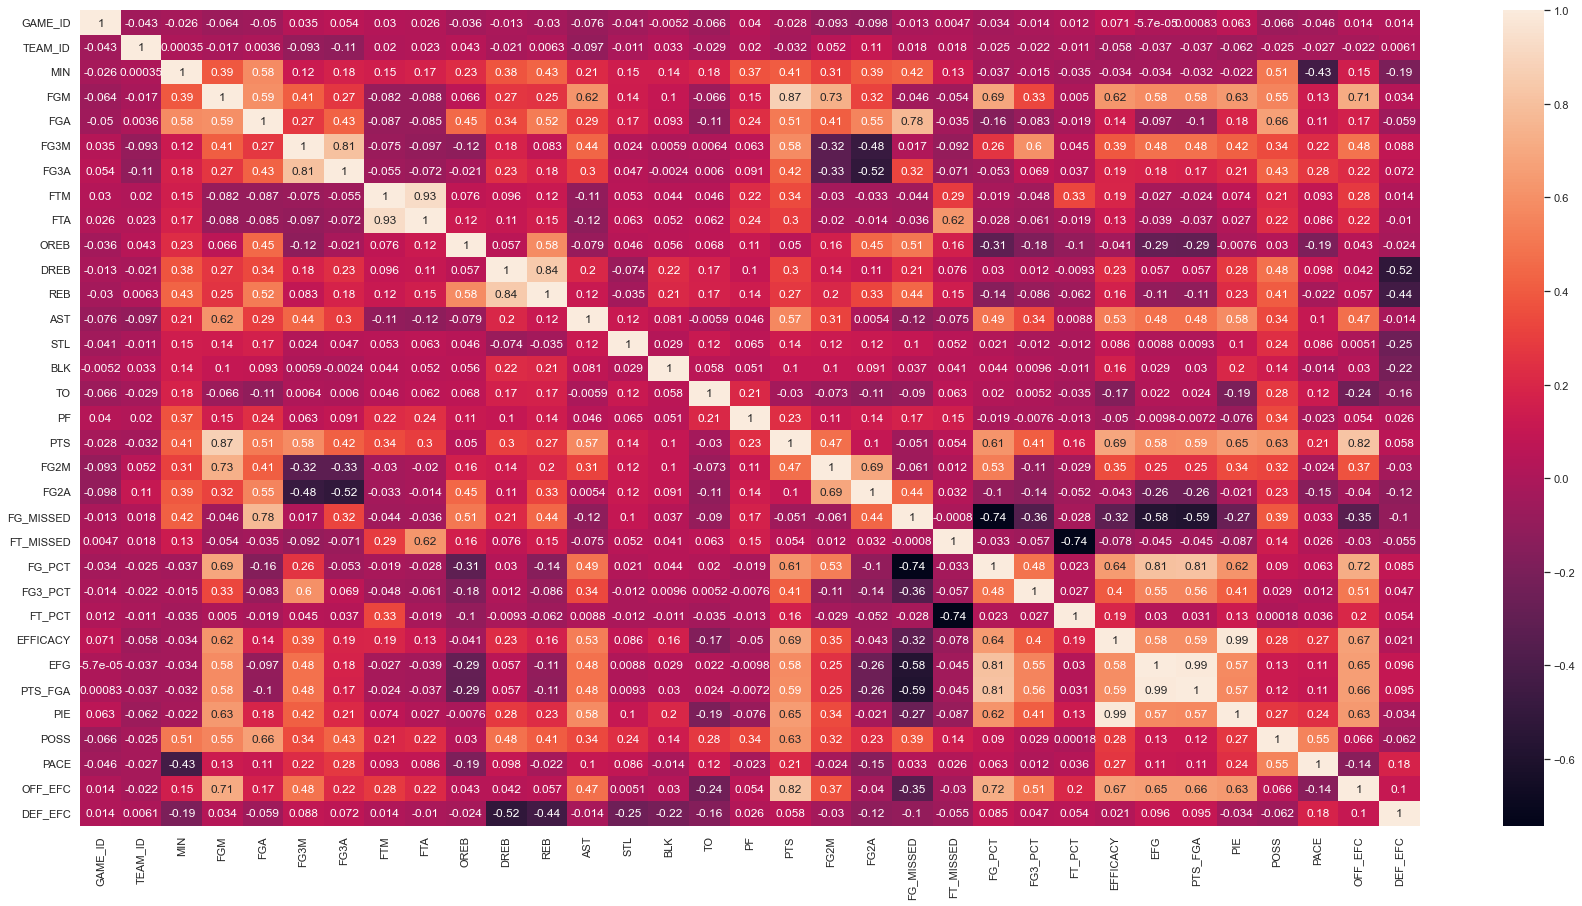

In [44]:
#Correlation Plot
corr_matrix = games_details.corr()
sns.set(rc={'figure.figsize':(30,15)})
sns.heatmap(corr_matrix, annot=True)